exploring the mean price by zipcode

In [1]:
import os
import sys
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [3]:
zipdata = pd.read_sql("""
                    SELECT 
                        SUBSTRING (rb.zipcode, 1,5) AS zipcode
                        ,AVG(rps.saleprice) as meansaleprice
                        ,AVG(rb.squarefeettotalliving) as meansqft
                    FROM real_property_sales rps
                    JOIN residential_building rb
                         ON rb.major = rps.major
                         AND rb.minor = rps.minor
                    WHERE  (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving > 800 AND rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                    GROUP BY SUBSTRING (rb.zipcode, 1,5)""",conn)

In [4]:
zipdata.head()

,zipcode,meansaleprice,meansqft
0,,8.489248e+05,2437.367753
1,91844,8.200000e+05,2100.000000
2,98,1.890000e+06,3810.000000
3,98001,4.031552e+05,1886.235465
4,98002,3.461035e+05,1550.407407


In [5]:
zipdata.shape

(84, 3)

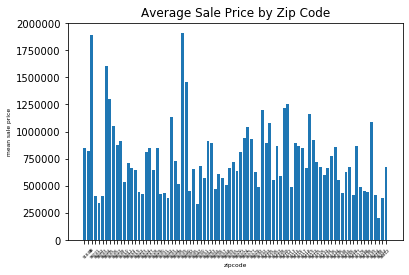

In [6]:
zipcode = zipdata.zipcode
meansaleprice = zipdata.meansaleprice
meansqft = zipdata.meansqft
plt.bar (zipcode, meansaleprice)
plt.xlabel ('zipcode', fontsize = 6)
plt.ylabel ('mean sale price', fontsize = 6)
plt.xticks (zipcode, fontsize = 4, rotation = 45)
plt.title ('Average Sale Price by Zip Code')
plt.show()

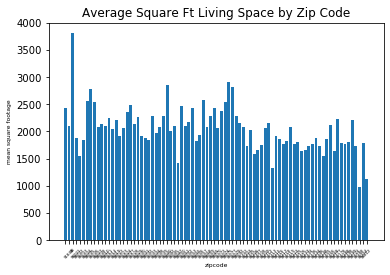

In [7]:
plt.bar (zipcode, meansqft)
plt.xlabel ('zipcode', fontsize = 6)
plt.ylabel ('mean square footage', fontsize = 6)
plt.xticks (zipcode, fontsize = 4, rotation = 45)
plt.title ('Average Square Ft Living Space by Zip Code')
plt.show ();

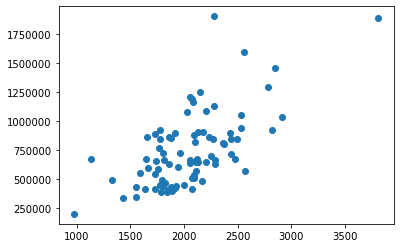

In [9]:
plt.scatter(meansqft,meansaleprice);

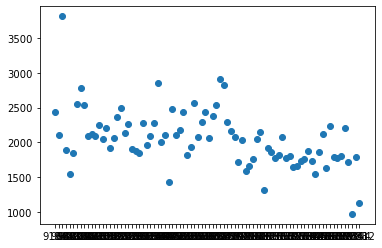

In [11]:
plt.scatter(zipcode, meansqft);